In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv(r"CarPrice_Assignment.csv")

<Axes: >

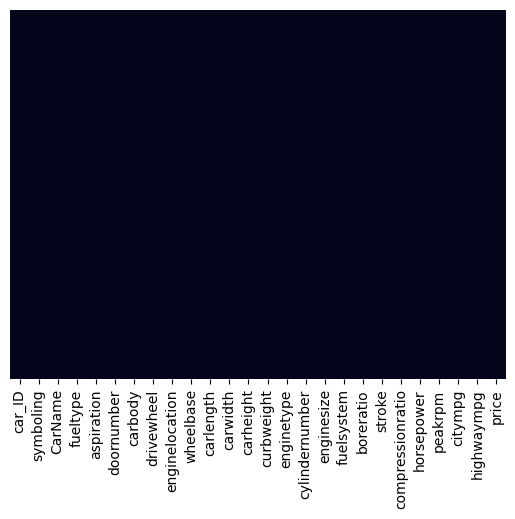

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df['symboling'] = df['symboling'].astype('object')

In [7]:
X = pd.DataFrame(df[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
y = df['price']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [9]:
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [10]:
X = X.drop(columns = df_categorical.columns, axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 20.9 KB


In [12]:
cwmedian = X['curbweight'].median()
cwstd =X['curbweight'].std()
X.loc[(X['curbweight']-cwmedian).abs()>cwstd, 'curbweight'] = np.nan
X['curbweight'] = X['curbweight'].fillna(value=X['curbweight'].median())

# TRAIN MODEL

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_model = LinearRegression()

In [26]:
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
print('Coef: ', linear_model.coef_)

Coef:  [ 4.45687463e+01 -7.48469498e+01  9.68640639e+02  2.02373623e+02
  3.52516370e-01  1.03379798e+02 -1.83329825e+03 -3.07404995e+03
  4.11249494e+02  3.07613744e+01  2.66924853e+00 -2.08119330e+02
  2.94429884e+01]


In [28]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

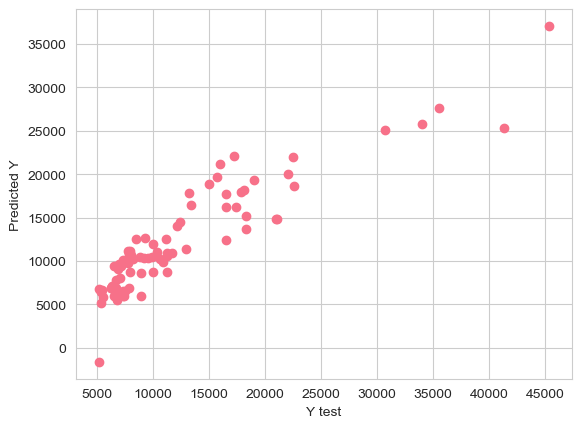

In [29]:
sns.set_palette('husl')
sns.set_style('whitegrid')
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [30]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  2356.033485787933
MSE:  11771076.554878417
RMSE:  3430.900254288722


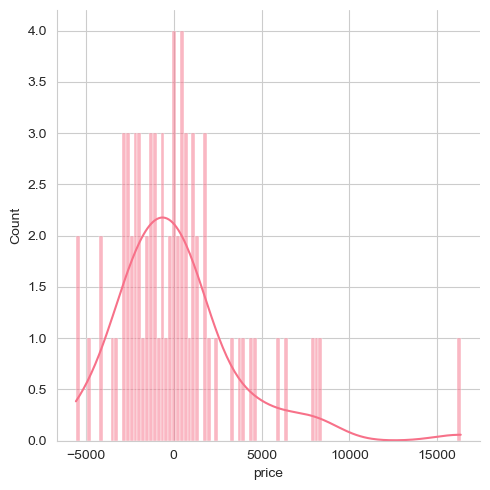

In [22]:
sns.displot((y_test-prediction), bins=100, kde = True)

In [31]:
X_test

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
120,93.7,157.3,63.8,50.6,1967.0,90,2.97,3.23,9.4,68,5500,31,38
185,97.3,171.7,65.5,55.7,2212.0,109,3.19,3.40,9.0,85,5250,27,34
180,104.5,187.8,66.5,54.1,2328.0,171,3.27,3.35,9.2,156,5200,20,24
119,93.7,157.3,63.8,50.8,2128.0,98,3.03,3.39,7.6,102,5500,24,30
109,114.2,198.9,68.4,58.7,2328.0,120,3.46,3.19,8.4,97,5000,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,102.4,175.6,66.5,53.9,2414.0,122,3.31,3.54,8.7,92,4200,27,32
13,101.2,176.8,64.8,54.3,2765.0,164,3.31,3.19,9.0,121,4250,21,28
52,93.1,159.1,64.2,54.1,1905.0,91,3.03,3.15,9.0,68,5000,31,38
117,108.0,186.7,68.3,56.0,2328.0,134,3.61,3.21,7.0,142,5600,18,24


In [32]:
data = {
    'wheelbase' : [200],
    'carlength' : [200],
    'carwidth' : [100],
    'carheight' : [60],
    'curbweight' : [3000],
    'enginesize' : [200],
    'boreratio' : [200],
    'stroke' : [4],
    'compressionratio' : [20],
    'horsepower' : [300],
    'peakrpm' : [300],
    'citympg' : [30],
    'highwaympg' : [100]
}

df_pred = pd.DataFrame(data)

In [33]:
new_pred = linear_model.predict(df_pred)

In [34]:
print(new_pred)

[-306764.1048062]
